In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('calories_data.csv')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68.0,190.0,NaN,29.0,105.0,40.8,231.0
1,14861698,female,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27.0,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20.0,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27.0,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43.0,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78.0,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63.0,173.0,79.0,18.0,92.0,40.5,98.0


In [5]:
df.shape

(15000, 9)

In [6]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         14979 non-null  float64
 3   Height      15000 non-null  float64
 4   Weight      14986 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,14979.000000,15000.000000,14986.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.774952,174.465133,74.964500,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.974281,14.258114,15.037271,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df.isna().sum()

User_ID        0
Gender         0
Age           21
Height         0
Weight        14
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

In [10]:
df['Age'].unique()

array([68., 20., 69., 34., 27., 36., 33., 41., 60., 26., 21., nan, 32.,
       53., 39., 46., 50., 67., 31., 48., 29., 42., 62., 38., 25., 24.,
       22., 74., 70., 44., 61., 63., 54., 35., 28., 77., 64., 45., 66.,
       57., 49., 47., 40., 55., 23., 43., 52., 79., 51., 59., 30., 37.,
       56., 78., 58., 73., 65., 71., 75., 72., 76.])

In [11]:
df['Weight'].unique()

array([ nan,  60.,  79.,  71.,  58.,  50.,  56.,  85.,  94.,  51.,  76.,
        54.,  62.,  82.,  67.,  65.,  86.,  93.,  59.,  75.,  73.,  88.,
        68.,  84.,  80.,  57.,  70.,  66.,  55.,  98.,  69., 101.,  89.,
        64.,  63.,  77.,  61.,  83.,  92.,  72., 100.,  91.,  74.,  87.,
       107.,  53.,  96.,  81.,  90.,  45.,  52.,  49.,  78.,  47.,  95.,
       109., 104., 102., 103., 105., 112.,  97.,  99., 111.,  42., 115.,
        38.,  46., 108., 106.,  48.,  40.,  44., 114.,  41., 110.,  43.,
       118., 113., 124., 117., 122., 120., 116., 121., 132.,  39., 119.,
        36., 128., 126., 123.])

In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Weight']=df['Weight'].fillna(df['Weight'].mean())

In [13]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
df.drop('User_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68.0,190.0,74.9645,29.0,105.0,40.8,231.0
1,female,20.0,166.0,60.0000,14.0,94.0,40.3,66.0
2,male,69.0,179.0,79.0000,5.0,88.0,38.7,26.0
3,female,34.0,179.0,71.0000,13.0,100.0,40.5,71.0
4,female,27.0,154.0,58.0000,10.0,81.0,39.8,35.0


In [15]:
label=LabelEncoder()
df1=df['Gender']=label.fit_transform(df['Gender'])
df1

array([1, 0, 1, ..., 0, 1, 1])

In [16]:
df['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

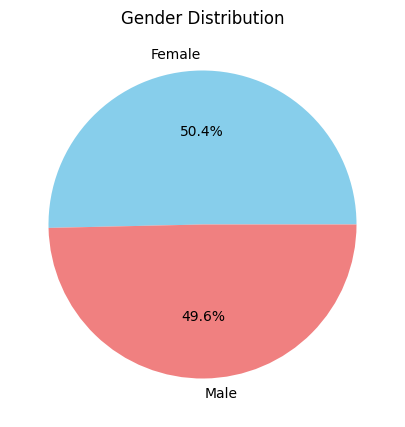

In [17]:
gender_counts=df['Gender'].value_counts()
gender_label=['Female','Male']

plt.figure(figsize=(10,5))
plt.pie(gender_counts,labels=gender_label,autopct='%1.1f%%',colors=['skyblue','lightcoral'])
plt.title('Gender Distribution')
plt.show()

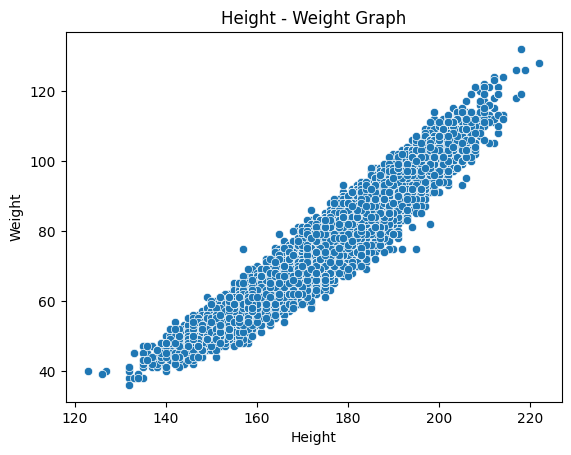

In [18]:
sns.scatterplot(x='Height',y='Weight',data=df)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height - Weight Graph')
plt.show()

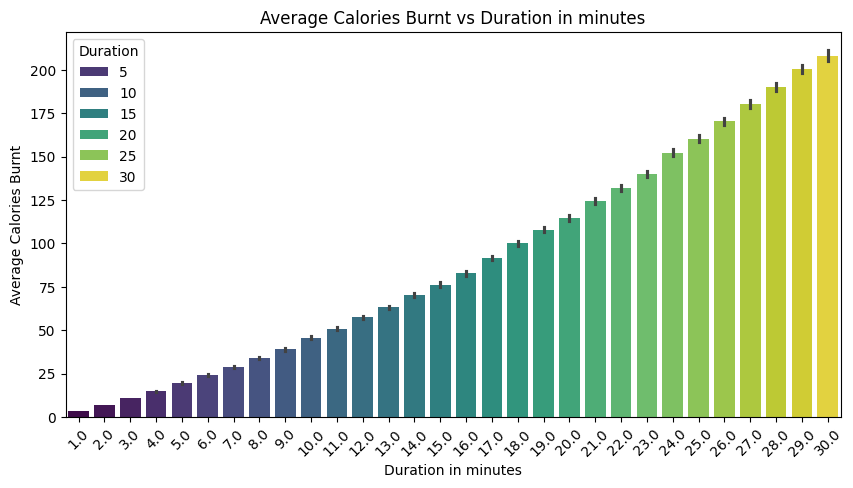

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Duration',y='Calories',data=df,estimator=np.mean,palette='viridis',hue='Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Average Calories Burnt')
plt.title('Average Calories Burnt vs Duration in minutes')
plt.xticks(rotation=45)
plt.show()

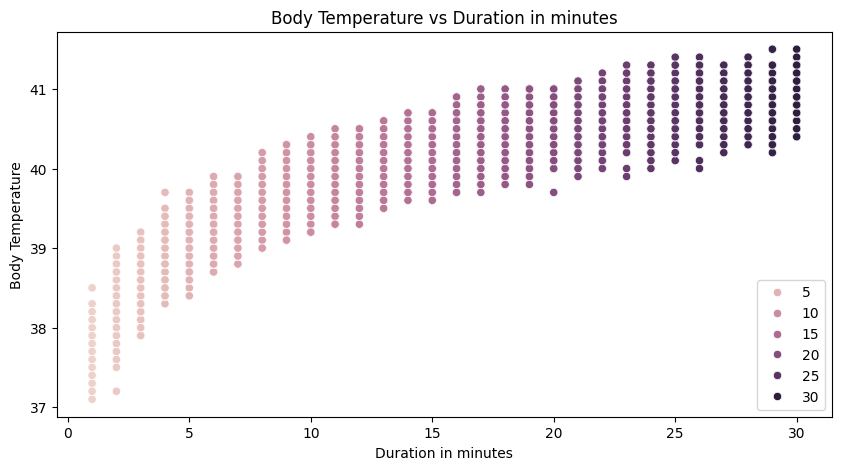

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Duration',y='Body_Temp',data=df,hue='Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Body Temperature')
plt.title('Body Temperature vs Duration in minutes')
plt.legend(loc='lower right')
plt.show()

In [21]:
df.dtypes

Gender          int32
Age           float64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

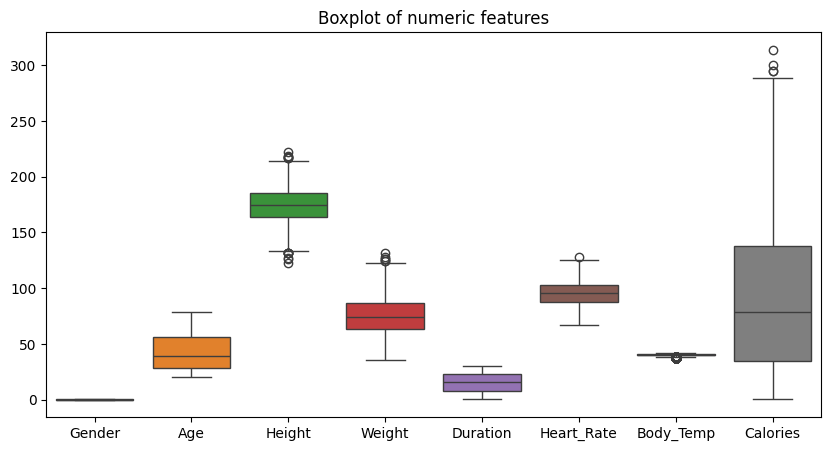

In [22]:
numeric_cols=df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of numeric features')
plt.show()

In [23]:
outlier_columns=['Height','Weight','Heart_Rate','Body_Temp','Calories']

def remove_ouliers(df,columns):
    
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)

        IQR=Q3-Q1

        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

    return df

df_cleaned=remove_ouliers(df,outlier_columns)
df_cleaned.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68.0,190.0,74.9645,29.0,105.0,40.8,231.0
1,0,20.0,166.0,60.0000,14.0,94.0,40.3,66.0
2,1,69.0,179.0,79.0000,5.0,88.0,38.7,26.0
3,0,34.0,179.0,71.0000,13.0,100.0,40.5,71.0
4,0,27.0,154.0,58.0000,10.0,81.0,39.8,35.0


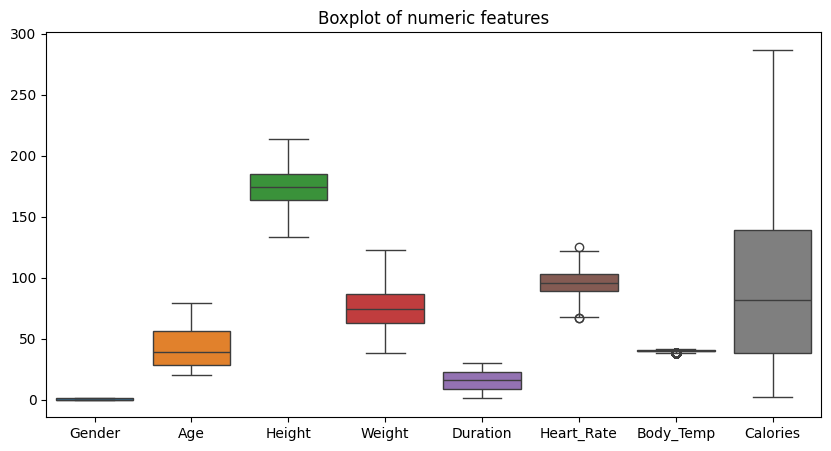

In [24]:
numeric_cols=df_cleaned.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('Boxplot of numeric features')
plt.show()

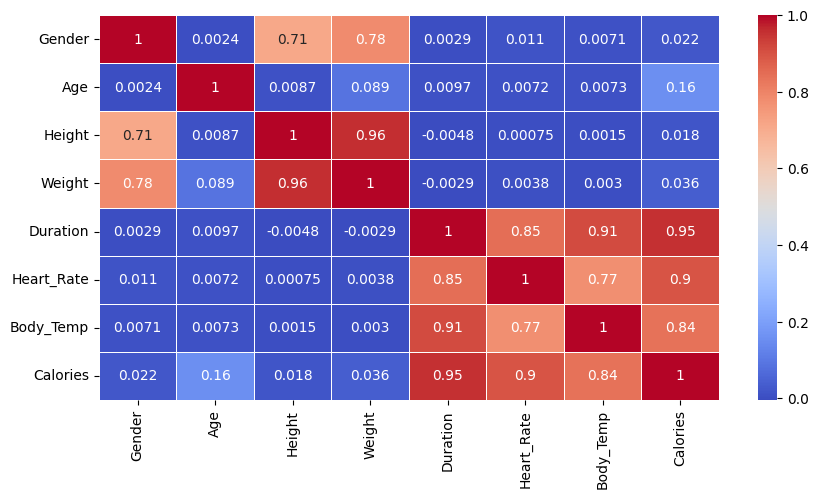

In [25]:
correlation_matrix=df_cleaned.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

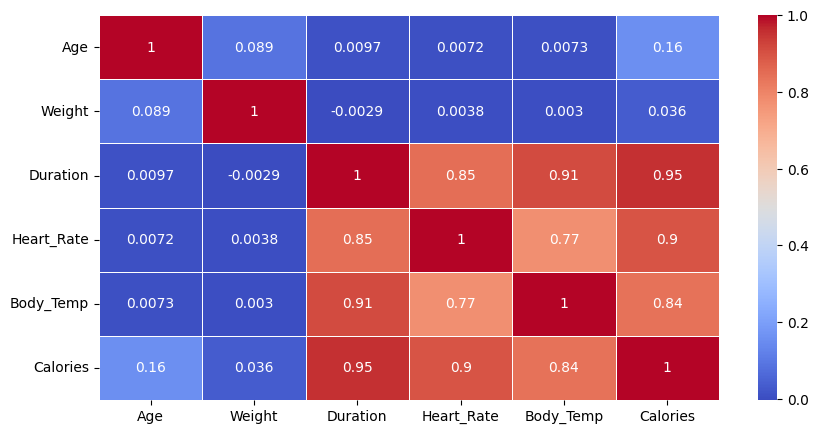

In [26]:
df_selected=df_cleaned.drop(columns=['Height','Gender'])

correlation_matrix=df_selected.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()